<a href="https://colab.research.google.com/github/sahug/tensorflow-colab/blob/master/Tensorflow_2_0_Bank_Customer_Satisfaction_Using_CNN_and_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Satisfaction Using CNN and Feature Selection**

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 50kB/s 
     |████████████████████████████████| 3.8MB 66.6MB/s 
     |████████████████████████████████| 450kB 66.6MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=259ea07822799b9e6a390465dcf14826022744dd42c6e9dd2ee05b6dd9b7852f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

In [38]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [3]:
print(tf.__version__)

2.0.0


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [6]:
# Dataset Link - https://github.com/laxmimerit/Data-Files-for-Feature-Selection
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 6), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [7]:
# Read Data
data = pd.read_csv("/content/Data-Files-for-Feature-Selection/santander-train.csv")
data.head()

# target is 0 - Unsattisfied and 1 Satisfied in below data.

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [8]:
data.shape

(76020, 371)

In [9]:
x = data.drop(labels=["ID", "TARGET"], axis=1) # Dropping unnecessary data

In [11]:
x.shape

(76020, 369)

In [12]:
y = data["TARGET"] # This is waht we are predicting

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

#### **Remove Constant, Quassi Constant and Duplicate Features**

In [15]:
filter = VarianceThreshold(0.01) # Removing 1%
x_train = filter.fit_transform(x_train)
x_test = filter.transform(x_test)

In [16]:
x_train.shape, x_test.shape

((60816, 273), (15204, 273))

In [18]:
# Removing Duplicates.
# Transpossing Rows and Columns
x_train_t = x_train.T
x_test_t = x_test.T

In [19]:
x_train_t = pd.DataFrame(x_train_t)
x_test_t = pd.DataFrame(x_test_t)

In [20]:
# Here we can see we have transformed rows into columns and columns into rows
x_train_t.shape, x_test_t.shape 

((273, 60816), (273, 15204))

In [21]:
x_train_t.duplicated().sum() # Finiding No of Duplicated Features that needs to be removed.

17

In [22]:
duplicated_features = x_train_t.duplicated()
duplicated_features

#True gives duplicated features and False non duplicated features

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [23]:
# Now we only want to keep non duplicated features.
# Inverting True to False and False to True
features_to_keep = [not index for index in duplicated_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [24]:
# Filtering and Transpossing back to original form
x_train = x_train_t[features_to_keep].T
x_train.shape

(60816, 256)

In [25]:
x_test = x_test_t[features_to_keep].T
x_test.shape

(15204, 256)

#### Standardizing data. Bringing variance to common level.

In [26]:
x_train, x_test # Here we can see lot of zeroes and hig differences in values.

(       0     1        2    3    4    ...  268  269  270  271            272
 0      2.0  26.0      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  117310.979016
 1      2.0  23.0      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   85472.340000
 2      2.0  23.0      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  317769.240000
 3      2.0  30.0      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   76209.960000
 4      2.0  23.0      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  302754.000000
 ...    ...   ...      ...  ...  ...  ...  ...  ...  ...  ...            ...
 60811  2.0  23.0      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   48888.000000
 60812  2.0  36.0      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   55244.850000
 60813  2.0  41.0      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   75404.010000
 60814  2.0  31.0      0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  117310.979016
 60815  2.0  37.0  12600.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  117310.979016
 
 [60816 rows x 256 columns],
        0     1      2    3    4    5    ... 

In [28]:
# Bringing down the differences.
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
x_train, x_test # Now we can see the differences are close enough

(array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
         -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
        [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
         -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
        [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
         -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
        ...,
        [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
         -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
        [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
         -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
        [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
         -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]]),
 array([[ 0.03804785, -0.7871819 , -0.05273314, ..., -0.01870463,
         -0.01977204, -0.53048634],
        [ 0.03804785,  1.44729011, -0.05273314, ..., -0.01870463,
         -0.01977204,  0.0516918 ],
        [ 0.03804785, -0.

In [30]:
x_train.shape, x_test.shape

((60816, 256), (15204, 256))

In [31]:
# Reshapping the 2D data to 3D as neural networks understand 3D
x_train = x_train.reshape(60816, 256, 1)
x_test = x_test.reshape(15204, 256, 1)

In [32]:
x_train.shape, x_test.shape

((60816, 256, 1), (15204, 256, 1))

In [33]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Build CNN

In [36]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(256, 1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=64, kernel_size=3, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(filters=128, kernel_size=3, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 254, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0

In [39]:
model.compile(optimizer=Adam(lr=0.00005), loss="binary_crossentropy", metrics=["accuracy"])

In [40]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
60816/60816 [==============================] - 92s 2ms/sample - loss: 0.2012 - accuracy: 0.9548 - val_loss: 0.1695 - val_accuracy: 0.9604
Epoch 2/10
60816/60816 [==============================] - 89s 1ms/sample - loss: 0.1691 - accuracy: 0.9599 - val_loss: 0.1613 - val_accuracy: 0.9605
Epoch 3/10
60816/60816 [==============================] - 89s 1ms/sample - loss: 0.1633 - accuracy: 0.9602 - val_loss: 0.1598 - val_accuracy: 0.9603
Epoch 4/10
60816/60816 [==============================] - 90s 1ms/sample - loss: 0.1614 - accuracy: 0.9604 - val_loss: 0.1600 - val_accuracy: 0.9605
Epoch 5/10
60816/60816 [==============================] - 91s 1ms/sample - loss: 0.1568 - accuracy: 0.9604 - val_loss: 0.1569 - val_accuracy: 0.9604
Epoch 6/10
60816/60816 [==============================] - 90s 1ms/sample - loss: 0.1554 - accuracy: 0.9604 - val_loss: 0.1574 - val_accuracy: 0.9605
Epoch 7/10
60816/60816 [==============================] 

In [41]:
history.history

{'accuracy': [0.95478165,
  0.9599119,
  0.9602407,
  0.96037227,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604216,
  0.96045446,
  0.960438],
 'loss': [0.20116640048253948,
  0.1690924520060612,
  0.1633230782986487,
  0.16135953353721352,
  0.15680258860578822,
  0.15544014670576148,
  0.15328941396267295,
  0.15114719515298344,
  0.1497597039643635,
  0.1497154820007702],
 'val_accuracy': [0.9604052,
  0.9604709,
  0.96033937,
  0.9604709,
  0.9604052,
  0.9604709,
  0.9604052,
  0.96033937,
  0.9602736,
  0.9600763],
 'val_loss': [0.1694878168233568,
  0.1613120600685058,
  0.1597593156402792,
  0.15996350266943007,
  0.15686084909261183,
  0.15735092183775462,
  0.1554249778788824,
  0.15469938189563578,
  0.15652284106120595,
  0.15667106327055608]}

In [42]:
epoch_range = range(1, 11)

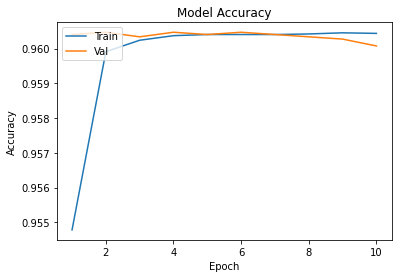

In [43]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

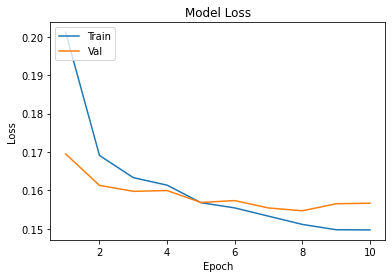

In [44]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()